<a href="https://colab.research.google.com/github/AnuragGorkar/Board_Game_Review_Prediction/blob/master/Board_Game_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
import seaborn as sns 
import sklearn
sns.set()

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
games = pd.read_csv("/content/drive/My Drive/MACHINE LEARNING DATASETS/games.csv")

In [4]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


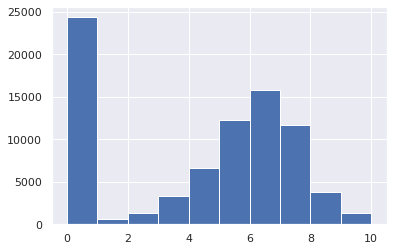

In [5]:
plt.hist(games["average_rating"])
plt.show()

In [6]:
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


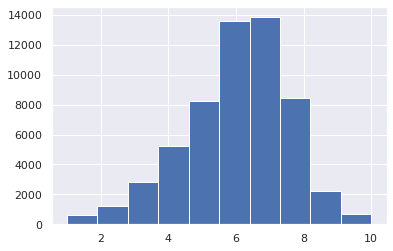

In [7]:
games = games[games["users_rated"] > 0]
games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

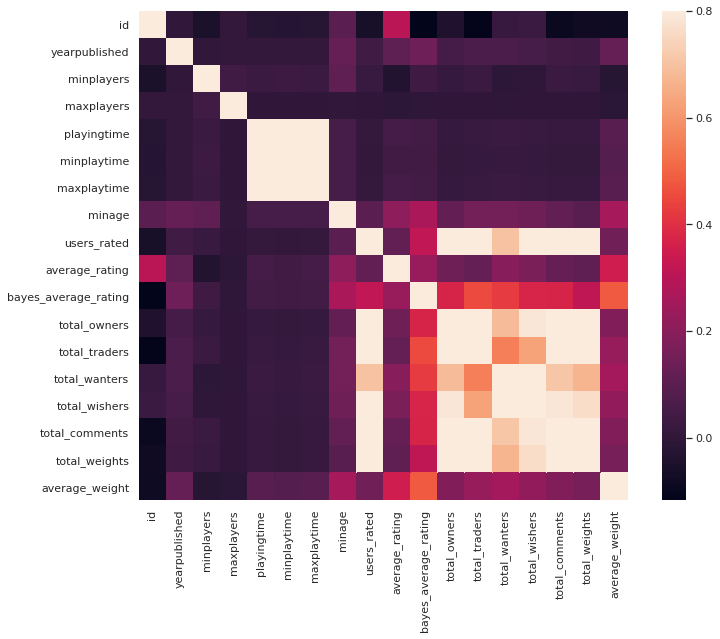

In [8]:
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat , vmax = 0.8, square = True)

In [0]:
columns = games.columns.to_list()

columns = [c for c in columns if c not in  ["bayes_average_rating", "average_rating", "type", "name", "id"]]

target = "average_rating"

In [0]:
train = games.sample(frac = 0.8, random_state = 1)
test = games.loc[~games.index.isin(train.index)]

In [11]:
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
LR = LinearRegression()
LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predictions = LR.predict(test[columns])
mean_squared_error(predictions, test[target])

2.078819032629323

In [0]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

In [16]:
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [17]:
predictions = RFR.predict(test[columns])
mean_squared_error(predictions, test[target])

1.4458560046071653

In [18]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [28]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))
print(f"ACTUAL RATING ::{test[target].iloc[0]}")
print(f"LINEAR REGRESSOR PREDICTED RATING :: {rating_LR}")
print(f"RANDOM FOREST PREDICTED RATING :: {rating_RFR}")

ACTUAL RATING ::8.07933
LINEAR REGRESSOR PREDICTED RATING :: [8.12061283]
RANDOM FOREST PREDICTED RATING :: [7.91373581]
